In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pyusadel import DifferentialOperators, UsadelProblem, gradient, laplacian

In [2]:
Nx = 401
x = np.linspace(-20, 20, Nx)
dx = x[1] - x[0]

h_x = np.zeros((Nx), dtype=float)
h_y = np.zeros((Nx), dtype=float)
h_z = np.zeros((Nx), dtype=float)

h_x[: Nx // 2] = 0.0
h_x[Nx // 2 :] = 1.4

tau_sf_inv = np.zeros((Nx), dtype=float)
tau_so_inv = np.zeros((Nx), dtype=float)

In [7]:
do = DifferentialOperators()
do.D_x = gradient(Nx, dx, boundary_condition="open")
do.D_y = np.zeros((Nx, Nx), dtype=float)
do.D_z = np.zeros((Nx, Nx), dtype=float)
do.L = laplacian(Nx, dx, boundary_condition="open")

D = 1.7655
T = 0.2

up = UsadelProblem(
    Nsites=Nx,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_sf_inv=tau_sf_inv,
    tau_so_inv=tau_so_inv,
    D=D,
    T=T,
    Gamma=1e-3,
    use_dense=False,
)

up.Delta = np.zeros((Nx), dtype=float)
up.Delta[: Nx // 2] += 1.764

In [8]:
h_c0 = up.h_c0
xi_00 = up.xi_00
Delta_00 = up.Delta_00

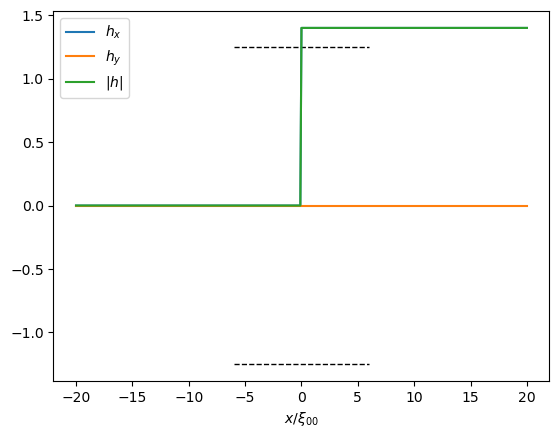

In [9]:
fig, ax = plt.subplots()
ax.hlines([h_c0, -h_c0], -6, 6, colors="k", linestyles="--", linewidth=1)
ax.plot(x / xi_00, h_x, "-", label=r"$h_x$")
ax.plot(x / xi_00, h_y, "-", label=r"$h_y$")
ax.plot(x / xi_00, np.sqrt(h_x**2 + h_y**2), "-", label=r"$|h|$")
ax.set_xlabel(r"$x / \xi_{00}$")
ax.legend()

## Gap equation solver

In [10]:
up.solve_self_consistent(verbose=True)

  1    Max Delta: 1.764    Residual: 1.63e-02    Free energy: -2.49e+02
  2    Max Delta: 1.764    Residual: 8.98e-03    Free energy: -2.58e+02
  3    Max Delta: 1.764    Residual: 6.33e-03    Free energy: -2.62e+02
  4    Max Delta: 1.763    Residual: 4.93e-03    Free energy: -2.64e+02
  5    Max Delta: 1.763    Residual: 4.07e-03    Free energy: -2.65e+02
  6    Max Delta: 1.763    Residual: 3.49e-03    Free energy: -2.66e+02
  7    Max Delta: 1.763    Residual: 3.08e-03    Free energy: -2.67e+02
  8    Max Delta: 1.763    Residual: 2.78e-03    Free energy: -2.67e+02
  9    Max Delta: 1.763    Residual: 2.55e-03    Free energy: -2.68e+02
 10    Max Delta: 1.763    Residual: 2.36e-03    Free energy: -2.68e+02
 11    Max Delta: 1.763    Residual: 2.20e-03    Free energy: -2.69e+02
 12    Max Delta: 1.763    Residual: 2.05e-03    Free energy: -2.69e+02
 13    Max Delta: 1.763    Residual: 1.93e-03    Free energy: -2.69e+02
 14    Max Delta: 1.763    Residual: 1.81e-03    Free energy: -2

In [11]:
cc_idx = np.argsort(np.abs(np.abs(h_x) - h_c0))

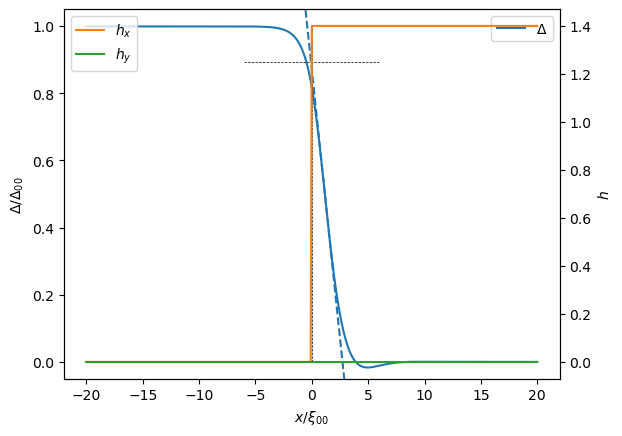

In [12]:
fig, ax = plt.subplots()
ax.plot(x / xi_00, up.Delta / Delta_00, "-C0", label=r"$\Delta$")
ax.set_ylabel(r"$\Delta / \Delta_{00}$")
ax.vlines(x[cc_idx[0]] / xi_00, 0, 1, colors="k", linestyles="--", linewidth=0.5)
# ax.vlines([x[cc_idx[1]]/xi_00], 0, 1, colors="-k", linestyles="--", linewidth=1)
ax.plot(
    x / xi_00,
    up.Delta[Nx // 2 + 10] / Delta_00
    + (np.diff(up.Delta / Delta_00) / (x[1] - x[0]))[Nx // 2 + 10]
    * (x - x[Nx // 2 + 10]),
    "C0--",
)

ax.set_ylim(-0.05, 1.05)
ax.set_xlabel(r"$x/\xi_{00}$")

ax2 = ax.twinx()
ax2.hlines([+h_c0], -6, 6, colors="k", linestyles="--", linewidth=0.5)
# ax2.hlines([-h_c], -6, 6, colors="k", linestyles="--", linewidth=1)

ax2.plot(x / xi_00, h_x, "-C1", label=r"$h_x$")
ax2.plot(x / xi_00, h_y, "-C2", label=r"$h_y$")
ax2.set_ylabel(r"$h$")

ax.legend()
ax2.legend()

## Spectrum solver

In [14]:
up.Gamma = 1e-3

up.set_real_omega_ax(-3, 3, 101)
up.solve_spectral(
    gamma=0.5, tol=1e-6, max_iter=1000, print_exit_status=True,
)

omega=3.00 : converged.
omega=2.94 : converged.
omega=2.88 : converged.
omega=2.82 : converged.
omega=2.76 : converged.
omega=2.70 : converged.
omega=2.64 : converged.
omega=2.58 : converged.
omega=2.52 : converged.
omega=2.46 : converged.
omega=2.40 : converged.
omega=2.34 : converged.
omega=2.28 : converged.
omega=2.22 : converged.
omega=2.16 : converged.
omega=2.10 : converged.
omega=2.04 : converged.
omega=1.98 : converged.
omega=1.92 : converged.
omega=1.86 : converged.
omega=1.80 : converged.
omega=1.74 : converged.
omega=1.68 : converged.
omega=1.62 : converged.
omega=1.56 : converged.
omega=1.50 : converged.
omega=1.44 : converged.
omega=1.38 : converged.
omega=1.32 : converged.
omega=1.26 : converged.
omega=1.20 : converged.
omega=1.14 : converged.
omega=1.08 : converged.
omega=1.02 : converged.
omega=0.96 : converged.
omega=0.90 : converged.
omega=0.84 : converged.
omega=0.78 : converged.
omega=0.72 : converged.
omega=0.66 : converged.
omega=0.60 : converged.
omega=0.54 : con

In [15]:
omega_ax = up.get_omega_ax_r()
DOS = up.get_dos()
DOSu, DOSd = up.get_spin_resolved_dos("x")

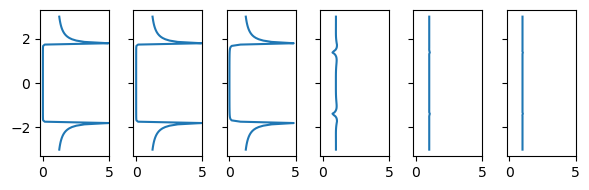

In [16]:
fig, ax = plt.subplots(ncols=6, figsize=(6, 2), sharey=True)

ax[0].plot(
    DOS[:, Nx // 5 * 0 + 10],
    omega_ax,
)
ax[1].plot(
    DOS[:, Nx // 5 * 1],
    omega_ax,
)
ax[2].plot(
    DOS[:, Nx // 5 * 2],
    omega_ax,
)
ax[3].plot(
    DOS[:, Nx // 5 * 3],
    omega_ax,
)

ax[4].plot(
    DOS[:, Nx // 5 * 4],
    omega_ax,
)

ax[5].plot(
    DOS[:, -1],
    omega_ax,
)

for sax in ax:
    sax.set_xlim(-0.2, 5)


fig.tight_layout()

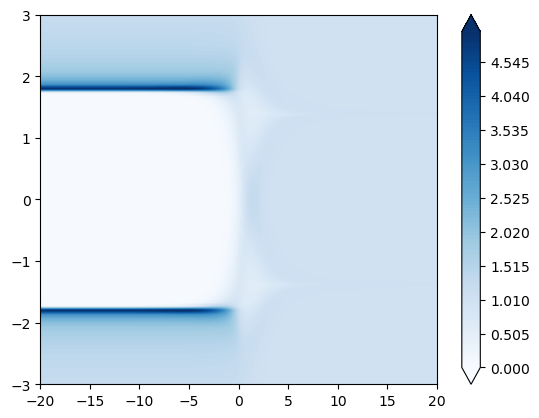

In [17]:
im = plt.contourf(
    x, omega_ax, DOS, extend="both", levels=np.linspace(0, 5, 100), cmap="Blues"
)
plt.colorbar(im)